In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
dataset =pd.read_csv('insurance.csv')
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [82]:
dataset.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [83]:
dataset.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [84]:
x= dataset.iloc[:,0:6].values
x

array([[19, 'female', 27.9, 0, 'yes', 'southwest'],
       [18, 'male', 33.77, 1, 'no', 'southeast'],
       [28, 'male', 33.0, 3, 'no', 'southeast'],
       ...,
       [18, 'female', 36.85, 0, 'no', 'southeast'],
       [21, 'female', 25.8, 0, 'no', 'southwest'],
       [61, 'female', 29.07, 0, 'yes', 'northwest']], dtype=object)

In [85]:
y= dataset.iloc[:,6].values
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

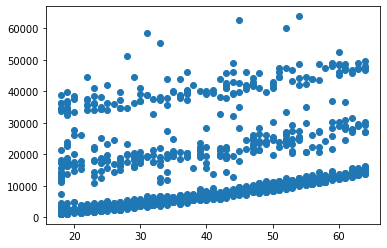

In [86]:
plt.scatter(x[:,0],y)

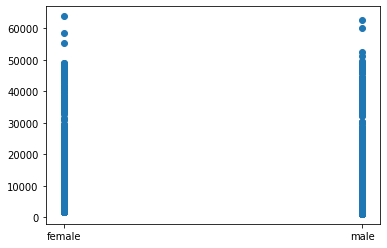

In [87]:
plt.scatter(x[:,1],y)

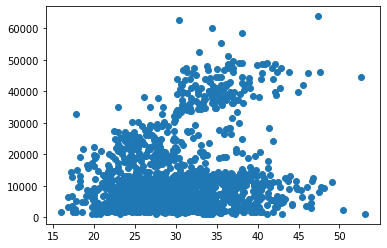

In [88]:
plt.scatter(x[:,2],y)

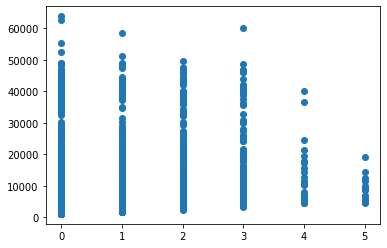

In [89]:
plt.scatter(x[:,3],y)

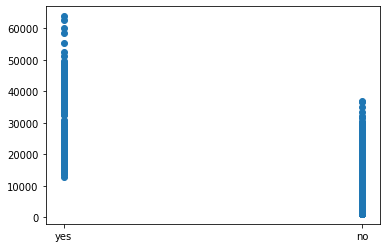

In [90]:
plt.scatter(x[:,4],y)

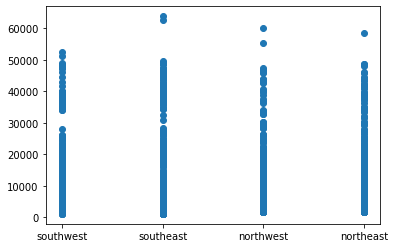

In [91]:
plt.scatter(x[:,5],y)

In [92]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [93]:
x[:,1]=lb.fit_transform(x[:,1])

In [94]:
x

array([[19, 0, 27.9, 0, 'yes', 'southwest'],
       [18, 1, 33.77, 1, 'no', 'southeast'],
       [28, 1, 33.0, 3, 'no', 'southeast'],
       ...,
       [18, 0, 36.85, 0, 'no', 'southeast'],
       [21, 0, 25.8, 0, 'no', 'southwest'],
       [61, 0, 29.07, 0, 'yes', 'northwest']], dtype=object)

In [95]:
x[:,4]=lb.fit_transform(x[:,4])

In [96]:
x

array([[19, 0, 27.9, 0, 1, 'southwest'],
       [18, 1, 33.77, 1, 0, 'southeast'],
       [28, 1, 33.0, 3, 0, 'southeast'],
       ...,
       [18, 0, 36.85, 0, 0, 'southeast'],
       [21, 0, 25.8, 0, 0, 'southwest'],
       [61, 0, 29.07, 0, 1, 'northwest']], dtype=object)

In [97]:
x.shape

(1338, 6)

In [98]:
ct= ColumnTransformer([("oh",OneHotEncoder(),[5])],remainder="passthrough")
x=ct.fit_transform(x)
x

array([[0.0, 0.0, 0.0, ..., 27.9, 0, 1],
       [0.0, 0.0, 1.0, ..., 33.77, 1, 0],
       [0.0, 0.0, 1.0, ..., 33.0, 3, 0],
       ...,
       [0.0, 0.0, 1.0, ..., 36.85, 0, 0],
       [0.0, 0.0, 0.0, ..., 25.8, 0, 0],
       [0.0, 1.0, 0.0, ..., 29.07, 0, 1]], dtype=object)

In [99]:
x.shape

(1338, 9)

In [100]:
x=x[:,1:]
x

array([[0.0, 0.0, 1.0, ..., 27.9, 0, 1],
       [0.0, 1.0, 0.0, ..., 33.77, 1, 0],
       [0.0, 1.0, 0.0, ..., 33.0, 3, 0],
       ...,
       [0.0, 1.0, 0.0, ..., 36.85, 0, 0],
       [0.0, 0.0, 1.0, ..., 25.8, 0, 0],
       [1.0, 0.0, 0.0, ..., 29.07, 0, 1]], dtype=object)

In [101]:
x.shape

(1338, 8)

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [104]:
x_train.shape

(1070, 8)

In [105]:
x_train.ndim

2

In [106]:
from sklearn.linear_model import LinearRegression
mr= LinearRegression()

In [107]:
mr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
y_predict=mr.predict(x_test)
y_predict

array([1.11699271e+04, 9.48670909e+03, 3.81811231e+04, 1.62663133e+04,
       6.91464801e+03, 3.96348488e+03, 1.57939691e+03, 1.43852566e+04,
       9.01257970e+03, 7.50846068e+03, 4.49176728e+03, 1.02795839e+04,
       8.80129751e+03, 3.79802013e+03, 2.79262010e+04, 1.07151158e+04,
       1.12889756e+04, 6.10501768e+03, 8.24104117e+03, 2.71445089e+04,
       3.36440910e+04, 1.43551043e+04, 1.17372043e+04, 3.21374335e+04,
       4.17005913e+03, 9.25496051e+03, 1.08433751e+03, 9.80417085e+03,
       3.77104596e+03, 1.04318587e+04, 9.00931722e+03, 4.00749509e+04,
       1.56889543e+04, 1.38794545e+04, 2.47597127e+04, 5.16638285e+03,
       1.26109277e+04, 3.07691018e+04, 3.35498325e+04, 3.67154946e+03,
       3.97568613e+03, 3.98729942e+03, 3.05285774e+04, 3.95053023e+04,
       2.78105036e+04, 5.09258923e+03, 1.06042481e+04, 7.82952256e+03,
       3.59255553e+03, 1.02128745e+04, 5.72038147e+03, 3.42627499e+03,
       3.30210242e+04, 3.84738218e+04, 1.60534782e+04, 7.16491905e+03,
      

In [109]:
mr.predict([[1,1,1,0,0,23,0,1]])

array([17568.72818548])

In [110]:
from sklearn.metrics import r2_score

In [111]:
r2_score(y_test,y_predict)

0.7999876970680436